<a href="https://colab.research.google.com/github/rajgupta-github/DeepLearning-with-Python/blob/master/TensorFlow/Learn_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install tensorflow-gpu

In [0]:
# !pip uninstall tf-nightly

In [0]:
# !pip install tf-nightly-gpu

In [0]:
import tensorflow as tf
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext tensorboard

from google.colab import drive
drive.mount('/content/drive')

In [0]:
x=tf.Variable(3)
y=tf.Variable(5)
z=x+y
print(z)

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

In [0]:
model = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28)),
         tf.keras.layers.Dense(128, activation="relu"),
         tf.keras.layers.Dense(10, activation="softmax"),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

log_dir= "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_images, train_labels, epochs=5, callbacks = [tensorboard_callback])



In [0]:
%tensorboard --logdir logs/fit

In [0]:
temp_df = pd.read_csv('/content/drive/My Drive/TensorFlow/original.csv')

In [33]:
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [0]:
temp_df.describe(include="all")

In [0]:
temp_df.info()

In [0]:
sns.scatterplot(x='Celsius', y='Fahrenheit', data=temp_df)

In [0]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [0]:
X_train.shape

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))


In [0]:
model.summary()

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = "mean_squared_error")

In [0]:
epoch_hist = model.fit(X_train, y_train, epochs=500)

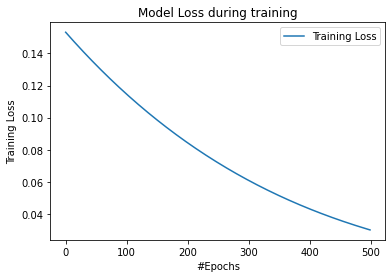

In [30]:
# plt.figure(figsize=(16,10))
plt.plot(epoch_hist.history['loss'])
plt.title("Model Loss during training")
plt.xlabel("#Epochs")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

In [31]:
model.get_weights()

[array([[1.8006862]], dtype=float32), array([31.826454], dtype=float32)]

In [34]:
model.predict([100])

array([[211.89508]], dtype=float32)